Notebook relativo ao método Single Value Decomposition (SVD)

- Descrição do notebook:
    - Descrição das funções utilizadas:
        - Aquisição da lista de arquivos edf
            - Input: file path
            - Output: 
        - Aquisição do sinal
            - Input: Arquivos .edf
            - Output: Array com os valores no range 0 a 255 (uint8)
        - Processar o SVD
            - Input: Array
            - Output: Obter os valores da matriz K
        - Realizar a compressão
- Input: 
    - Arquivos .edf
- Outputs: Análise das compressões
    - Talvez exemplares das imagens comprimidas para posterior comparação empírica
    - Taxas de compressão para samples de compressão
    - Outros parâmetros para avaliar a compressão

- To add:
    - Parâmetros de compressão

- Aquisição dos sinais

In [1]:
# Importing packages
%pwd
from edf_list import *
from numpy.linalg import svd
import numpy as np
import matplotlib.pyplot as plt

- A função abaixo, sigtes(), lê os dados do sinal:
    - Database: CHB-MIT Scalp EEG 
    - Paciente: 01 (chb01)
    - Channel: 0
    - EDF file: chb01-chb01_01.edf

In [2]:
signals = sigtes()

Reading Channels: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


In [3]:
signals

array([[-374,    0,    0, ...,  -30,   -8,   49]], dtype=int32)

- Função array_to_2d()
    - Transforma o sinal obtido do arquivo edf em uma matriz quadrada
    - Outputs:
        - A: Matriz obtida (ndarray)
        - b: quantidade de zeropadding adicionado para encaixar no formato

In [4]:
A, b = array_to_2d(signals)

In [5]:
A.shape

(960, 960)

In [6]:
U, S, V = svd(A, full_matrices=False)
S = np.diag(S)

In [7]:
U.shape, S.shape, V.shape

((960, 960), (960, 960), (960, 960))

In [8]:
A

array([[-374,    0,    0, ...,  -28,  -73,  -87],
       [-146,  -23,   75, ...,  -52,  -54,  -22],
       [ -14,   -9,   32, ...,   -1,  -77, -134],
       ...,
       [  17,   25,    2, ..., -261, -252, -244],
       [-260, -276, -296, ..., -207, -230, -226],
       [-205, -248, -241, ...,  -30,   -8,   49]], dtype=int32)

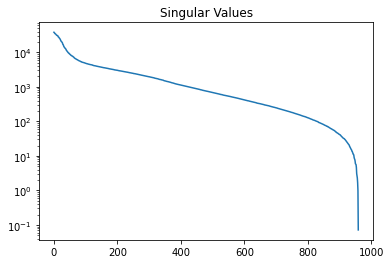

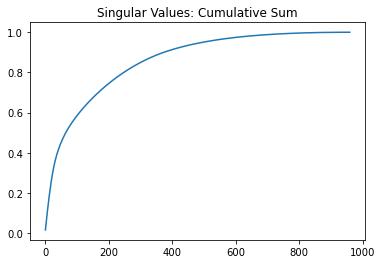

In [9]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

- Truncation
    - Chosen method:
        - Truncate using 90% energy criterion;
        - Since the noise on the signal is unknown, the chosen method is going to be relyied on energie dispended;

NameError: name 'r' is not defined

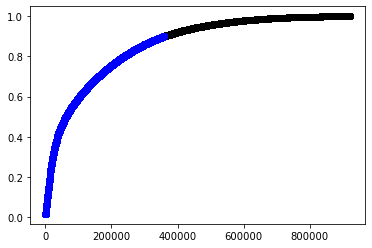

In [15]:
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r90 = np.min(np.where(cdS > 0.90)) # Find r to capture 90% energy

X90 = U[:,:(r90+1)] @ np.diag(S[:(r90+1)]) @ V[:(r90+1),:]

fig3,ax3 = plt.subplots(1)
ax3.plot(cdS,'-o',color='k',LineWidth=2)
ax3.plot(cdS[:(r90+1)],'o',color='b',LineWidth=2)
ax3.plot(cdS[:(r+1)],'o',color='r',LineWidth=2)
plt.xticks(np.array([0, 300, r90, 600]))
plt.yticks(np.array([0, 0.5, 0.9, 1]))
plt.xlim((-10,610))
ax3.plot(np.array([r90, r90, -10]),np.array([0, 0.9, 0.9]),'--',color='b',LineWidth=2)

ax3.grid()
plt.show()